In [1]:
source('../NMEG_utils/r_functions/load_nmeg.r')
library('xts')

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



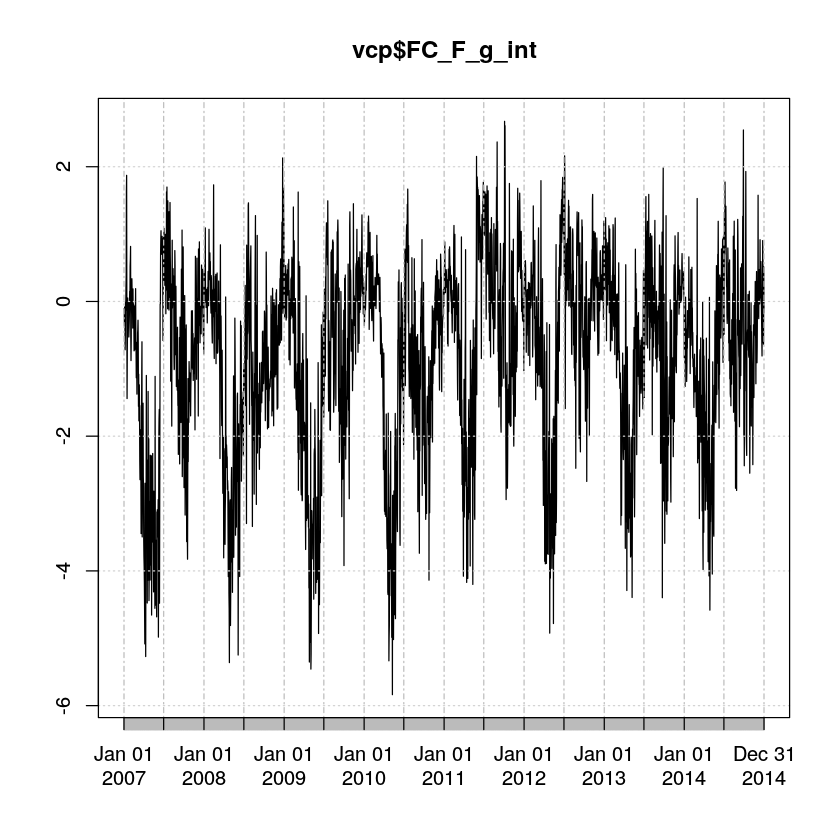

In [3]:
seg <- daily_to_xts(get_daily_file('Seg', 'aflx', make_new=FALSE))
ses <- daily_to_xts(get_daily_file('Ses', 'aflx', make_new=FALSE))
wjs <- daily_to_xts(get_daily_file('Wjs', 'aflx', make_new=FALSE))
mpj <- daily_to_xts(get_daily_file('Mpj', 'aflx', make_new=FALSE))
vcp <- daily_to_xts(get_daily_file('Vcp', 'aflx', make_new=FALSE))
vcm <- daily_to_xts(get_daily_file('Vcm', 'aflx', make_new=FALSE))
plot(vcp$FC_F_g_int)

In [134]:
# DONT NEED THIS ANYMORE - LEAVING FOR THE TS FILLING CODE

soil_path <- '/home/greg/sftp/eddyflux/Soil_files/provisional'
source('../NMEG_utils/r_functions/load_nmeg.r')
#seg_sqc <- get_multiyr_soilmet('GLand', soil_path, 'qc', startyear=2007, endyear=2014)
#ses <- daily_to_xts(get_daily_file('Ses', make_new=FALSE))
#wjs <- daily_to_xts(get_daily_file('Wjs', make_new=FALSE))
#mpj <- daily_to_xts(get_daily_file('Mpj', make_new=FALSE))
#vcp <- daily_to_xts(get_daily_file('Vcp', make_new=FALSE))
#vcm <- daily_to_xts(get_daily_file('Vcm', make_new=FALSE))
seg_s <- as.xts(seg_sqc[,8:ncol(seg_sqc)-1], as.Date(seg_sqc$date))
seg_s <- apply.daily(seg_s, mean, na.rm=TRUE)
seg_s <- seg_s[1:nrow(seg_s)-1,]
dim(seg_s)
# timeseries is shorter than 8 full years of days (2922)
sum(is.na(seg_s$SWC_G1_22p5_AVG))
# So, create a full 8 year time series to fill in gaps
x <- as.Date("2007-01-01"):as.Date("2014-12-31")
length(x)
# Mergi it into seg_s - missing days will be populated with NA
seg_s <- merge(seg_s, as.Date(x))
dim(seg_s)
sum(is.na(seg_s$SWC_G1_22p5_AVG)) # 224 more NA values
#seg_s <- endpoints(seg_s, on='day')
tail(seg_s)

[1] 2698  121

[1] 890

[1] 2922

[1] 2922  121

[1] 1114

           SWC_G1_2p5_AVG SWC_G1_12p5_AVG SWC_G1_22p5_AVG SWC_G2_2p5_AVG
2014-12-26     0.09979238      0.10817487      0.09056731     0.08041179
2014-12-27     0.07992291      0.10471971      0.08963550     0.07241337
2014-12-28     0.06953929      0.09895070      0.08833009     0.06915349
2014-12-29     0.07107007      0.09669988      0.08784494     0.07062086
2014-12-30     0.07620268      0.09881366      0.08796457     0.07314168
2014-12-31     0.06734095      0.09662957      0.08787562     0.06595284
           SWC_G2_12p5_AVG SWC_G2_22p5_AVG SWC_G3_2p5_AVG SWC_G3_12p5_AVG
2014-12-26      0.09374633      0.09315278            NaN             NaN
2014-12-27      0.08713968      0.09148901            NaN             NaN
2014-12-28      0.08371026      0.09022473            NaN             NaN
2014-12-29      0.08500889      0.08992183            NaN             NaN
2014-12-30      0.08726479      0.09032637            NaN             NaN
2014-12-31      0.08080471      0.08994359   

In [ ]:
seg_s <- daily_to_xts(get_daily_file('Seg', 'soilmet', make_new=FALSE))
ses_s <- daily_to_xts(get_daily_file('Ses', 'soilmet', make_new=FALSE))
wjs_s <- daily_to_xts(get_daily_file('Wjs', 'soilmet', make_new=FALSE))
mpj_s <- daily_to_xts(get_daily_file('Mpj', 'soilmet', make_new=FALSE))
vcp_s <- daily_to_xts(get_daily_file('Vcp', 'soilmet', make_new=FALSE))
vcm_s <- daily_to_xts(get_daily_file('Vcm', 'soilmet', make_new=FALSE))

An ‘xts’ object on 2007-01-01/2014-12-31 containing:
  Data: num [1:2922, 1:16] 0.00955 0.00886 0.00147 0.10324 0.15076 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:16] "GPP_g_int" "RECO_g_int" "FC_F_g_int" "ET_mm_fullday_0" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL
An ‘xts’ object on 2007-01-01/2014-12-31 containing:
  Data: num [1:2922, 1:118] NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:118] "SHF_G1_AVG" "SHF_G2_AVG" "SHF_O1_AVG" "SHF_O2_AVG" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


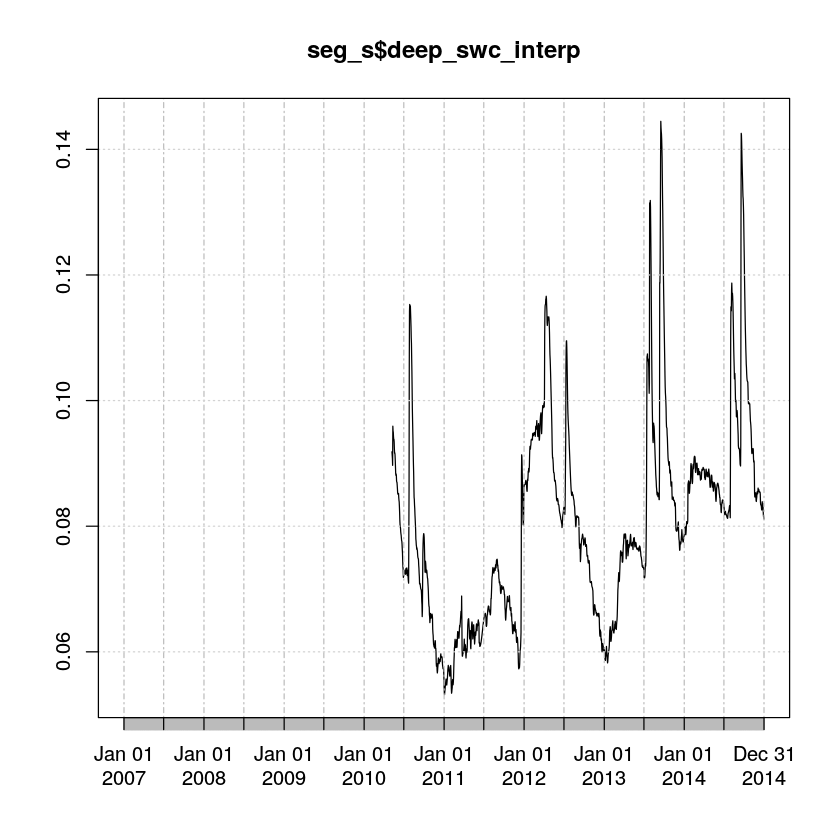

In [8]:
str(seg)
str(seg_s)
plot(seg_s$deep_swc_interp)

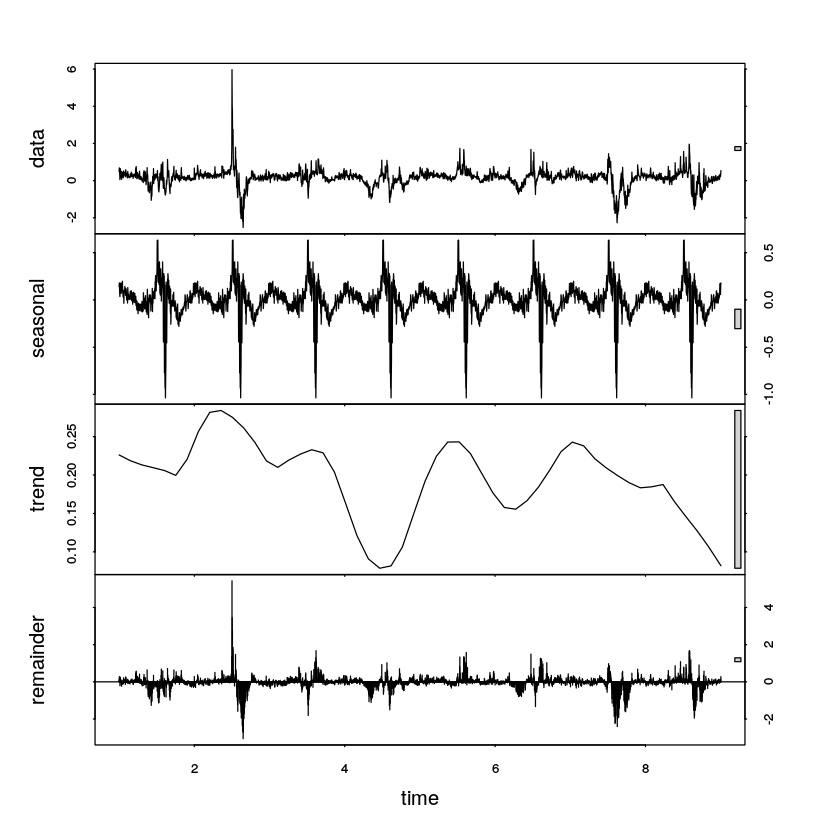

In [9]:
ts1 <- seg$FC_F_g_int
attr(ts1, 'frequency') <- 365
ts1_stl <- stl(as.ts(ts1), s.window="per", na.action=na.omit, robust=TRUE)
plot(ts1_stl)


In [10]:
# Make a timeseries our of this decomposition
stl_ts <- as.xts(zoo(ts1_stl$time.series, time(mpj)))
# Check index
str(stl_ts$remainder)

An ‘xts’ object on 2007-01-01/2014-12-31 containing:
  Data: num [1:2922, 1] 0.1143 0.2806 0.1964 0.0622 -0.2074 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "remainder"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


In [11]:
# Calculate the 30 day rolling precip sum
p_1m_sum <- rollapply(seg$P_F, 30, sum, align = "right")
str(p_1m_sum) # Make sure time indices are same as above

An ‘xts’ object on 2007-01-01/2014-12-31 containing:
  Data: num [1:2922, 1] NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "P_F"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


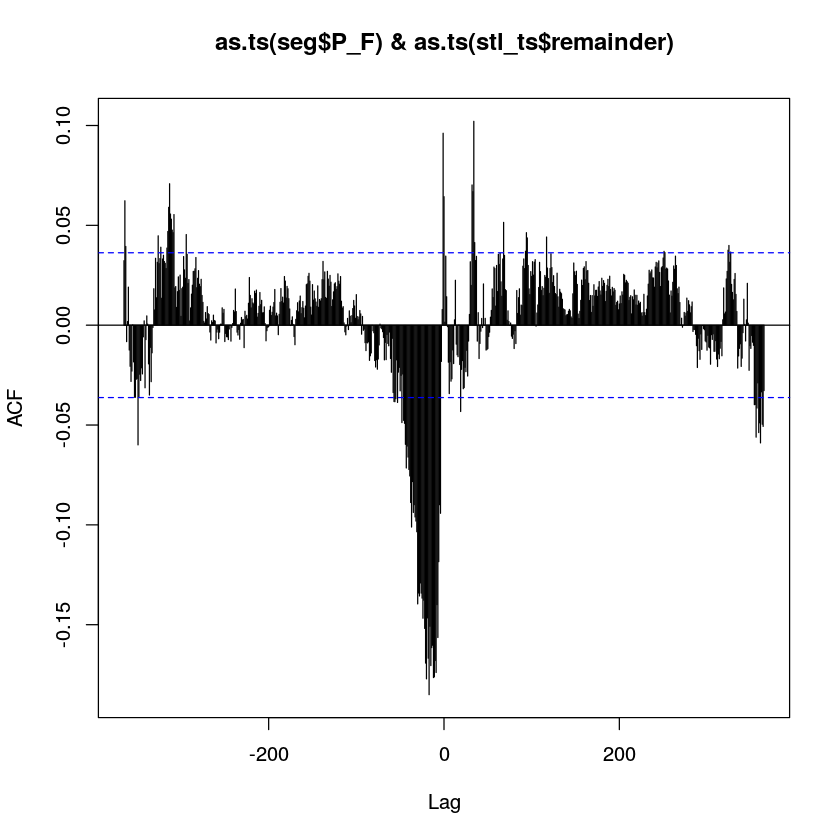

In [19]:
ccf(as.ts(seg$P_F), as.ts(stl_ts$remainder), lag.max=365)

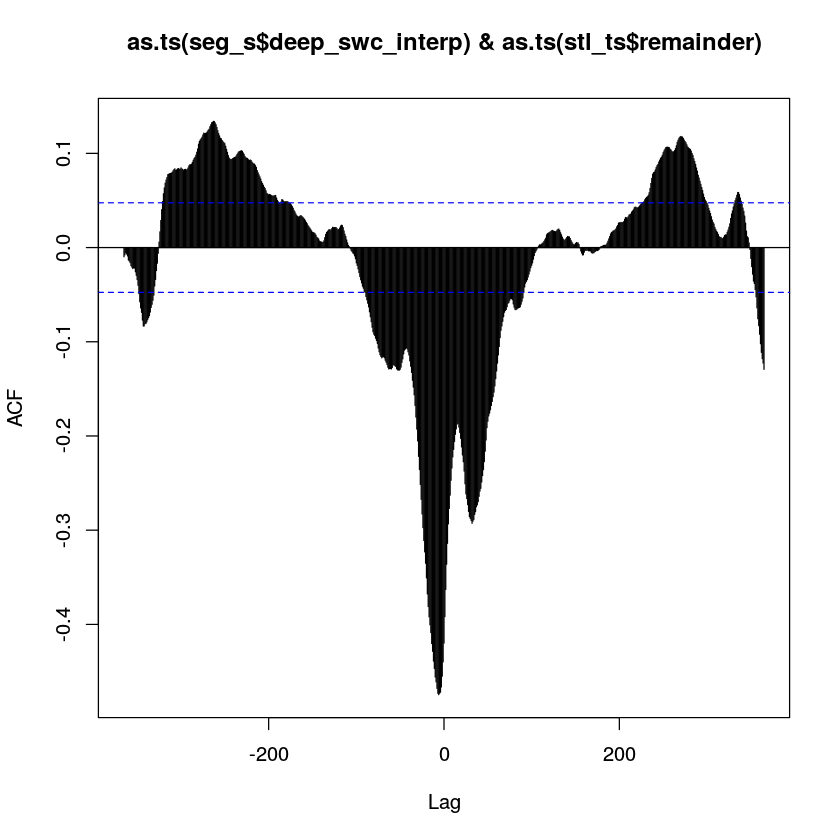

In [18]:
#sum(is.na(seg_s$SWC_G1_22p5_AVG))
#sum(is.na(stl_ts$remainder))

#seg_s$SWC_G1_22p5_AVG[is.na(seg_s$SWC_G1_22p5_AVG)] <- NA
#as.ts(seg_s$SWC_G1_22p5_AVG)
#tail(stl_ts)
#dim(seg_s)
ccf(as.ts(seg_s$deep_swc_interp), as.ts(stl_ts$remainder), lag.max=365, na.action=na.omit)